# **Task 1: Context-Aware Q&A**

In [1]:
from transformers import pipeline

In [2]:
model_name = "deepset/roberta-base-squad2"

In [3]:
qa_pipeline = pipeline("question-answering", model=model_name, tokenizer=model_name)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


In [4]:
context = """
Alexander Graham Bell was a Scottish-born inventor, scientist, and engineer who is credited
with inventing the first practical telephone in 1876. His invention revolutionized global
communication by allowing voices to be transmitted over long distances. Bell’s work laid
the foundation for the modern telecommunications industry, changing how people connected with each other.
"""

In [5]:
questions = {
    "Factual": "Who invented the first practical telephone?",
    "Contextual": "Why was Bell’s invention important?",
    "Inference-based": "What might have happened if Bell had not invented the telephone?"
}

In [6]:
for q_type, question in questions.items():
    result = qa_pipeline(question=question, context=context)
    print(f"{q_type} Question: {question}")
    print(f"Answer: {result['answer']}")

Factual Question: Who invented the first practical telephone?
Answer: Alexander Graham Bell
Contextual Question: Why was Bell’s invention important?
Answer: allowing voices to be transmitted over long distances
Inference-based Question: What might have happened if Bell had not invented the telephone?
Answer: changing how people connected with each other


# **Task 2: Custom Named Entity Extractor**

In [7]:
from transformers import pipeline
import pandas as pd

In [8]:
ner = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [9]:
text = """
I recently bought the new Samsung Galaxy S24, and the experience has been amazing.
The camera quality is outstanding, thanks to Samsung's AI enhancements.
I spoke to a customer representative named Alex Wilson at the Samsung Store in Mumbai,
and he guided me very well. Compared to my old Apple iPhone 12, this phone feels much smoother.
"""

In [10]:
entities = ner(text)
entities

[{'entity_group': 'MISC',
  'score': np.float32(0.9970297),
  'word': 'Samsung Galaxy S24',
  'start': 27,
  'end': 45},
 {'entity_group': 'ORG',
  'score': np.float32(0.99889886),
  'word': 'Samsung',
  'start': 129,
  'end': 136},
 {'entity_group': 'PER',
  'score': np.float32(0.99948025),
  'word': 'Alex Wilson',
  'start': 199,
  'end': 210},
 {'entity_group': 'ORG',
  'score': np.float32(0.98080397),
  'word': 'Samsung Store',
  'start': 218,
  'end': 231},
 {'entity_group': 'LOC',
  'score': np.float32(0.9993333),
  'word': 'Mumbai',
  'start': 235,
  'end': 241},
 {'entity_group': 'MISC',
  'score': np.float32(0.99779177),
  'word': 'Apple iPhone 12',
  'start': 290,
  'end': 305}]

In [11]:
filtered = [
    {
        "Entity": ent["word"],
        "Type": ent["entity_group"],
        "Confidence": round(ent["score"], 4)
    }
    for ent in entities
    if ent["entity_group"] in ["PER", "ORG"]
]

In [12]:
df = pd.DataFrame(filtered)
df.to_csv("ner_output.csv", index=False)
df

,Entity,Type,Confidence
0,Samsung,ORG,0.9989
1,Alex Wilson,PER,0.9995
2,Samsung Store,ORG,0.9808


## **Task 3: Multilingual Experiment (Translation)**

In [13]:
from transformers import pipeline

In [14]:
en_to_fr = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
en_to_hi = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi")

fr_to_en = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
hi_to_en = pipeline("translation", model="Helsinki-NLP/opus-mt-hi-en")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [15]:
text = """Artificial Intelligence is transforming every industry.
Companies are using AI to automate tasks, improve customer experience,
and make data-driven decisions faster than ever before."""

In [16]:
fr = en_to_fr(text)[0]['translation_text']

hi = en_to_hi(text)[0]['translation_text']

fr_en = fr_to_en(fr)[0]['translation_text']

hi_en = hi_to_en(hi)[0]['translation_text']

In [17]:
print("Original English:\n", text, "\n")
print("French Translation:\n", fr, "\n")
print("Back to English (from French):\n", fr_en, "\n")
print("Hindi Translation:\n", hi, "\n")
print("Back to English (from Hindi):\n", hi_en, "\n")

Original English:
 Artificial Intelligence is transforming every industry.
Companies are using AI to automate tasks, improve customer experience,
and make data-driven decisions faster than ever before. 

French Translation:
 L'intelligence artificielle transforme chaque secteur. Les entreprises utilisent l'IA pour automatiser les tâches, améliorer l'expérience client et prendre des décisions fondées sur les données plus rapidement que jamais. 

Back to English (from French):
 Artificial intelligence transforms every sector. Companies use AI to automate tasks, improve customer experience and make data-based decisions faster than ever before. 

Hindi Translation:
 कलापूर्ण तर्क हर उद्योग को परिवर्तित कर रहा है. गंभीरता से काम करने के लिए एआई का प्रयोग कर रहे हैं, ग्राहक का अनुभव सुधार, और डेटा-इन निर्णय पहले से भी तेजी से बनाने के लिए। 

Back to English (from Hindi):
 The artable argument is changing every industry. The AI are used to work seriously, to improve customer's experience, and


## **Task 4: Dual-Model Summarizer**

In [18]:
from transformers import pipeline

In [19]:
bart = pipeline("summarization", model="facebook/bart-large-cnn")
t5 = pipeline("summarization", model="t5-small")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [20]:
text = "Artificial Intelligence (AI) has rapidly evolved over the past decade, becoming one of the most influential technologies shaping modern society. From healthcare and transportation to finance and education, AI-powered systems are transforming the way organizations operate and make decisions. Machine learning algorithms analyze enormous datasets, identify patterns, and make predictions that help businesses improve efficiency and accuracy. In healthcare, AI assists doctors by detecting diseases at early stages, sometimes even more accurately than human specialists. In the automotive industry, self-driving cars rely on AI to interpret road conditions, avoid collisions, and optimize routes. Meanwhile, AI-driven automation is streamlining routine tasks in offices, allowing employees to focus on more creative and strategic work. Although AI offers tremendous benefits, it also raises concerns about job displacement, data privacy, and ethical decision-making by autonomous systems. As countries continue investing heavily in AI research, the global landscape is shifting toward a future where intelligent machines work alongside humans, enhancing productivity while demanding new regulations and digital skills. The ability of AI to learn and adapt over time suggests that its impact will only continue to grow, influencing nearly every aspect of economic and social life."

In [21]:
bart_summary = bart(text, max_length=150, min_length=60, do_sample=False)[0]['summary_text']
t5_summary = t5("summarize: " + text, max_length=150, min_length=60, do_sample=False)[0]['summary_text']

Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [22]:
print("===== BART Summary =====\n", bart_summary, "\n")
print("===== T5 Summary =====\n", t5_summary)

===== BART Summary =====
 Artificial Intelligence (AI) has rapidly evolved over the past decade. From healthcare and transportation to finance and education, AI-powered systems are transforming the way organizations operate and make decisions. Although AI offers tremendous benefits, it also raises concerns about job displacement, data privacy, and ethical decision-making by autonomous systems. 

===== T5 Summary =====
 AI-powered systems are transforming the way organizations operate and make decisions . AI helps doctors by detecting diseases at early stages, sometimes even more accurately than human specialists . in automotive, self-driving cars rely on AI to interpret road conditions, avoid collisions, and optimize routes .


## **Task 5: Batch Image Classification**

In [23]:
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

In [24]:
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [25]:
urls = [
    "https://imgs.search.brave.com/Hg7gtnuyo5ZceSEnABJl95IrE16gH1wzD7fT1hble_4/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly90aHVt/YnMuZHJlYW1zdGlt/ZS5jb20vYi9zdHJl/dGNoLWxpbW8tbGlt/b3VzaW5lLWJpZy1j/YXItMTI5NzY1Ny5q/cGc",
    "https://imgs.search.brave.com/60iSAQWBE6PRUtsRFfV6TMY2swX4LlibefrM6rr3Meo/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5pc3RvY2twaG90/by5jb20vaWQvMTg1/MzA1MTIzL3Bob3Rv/L3N1di1jYXItaW4t/c3R1ZGlvLWlzb2xh/dGVkLW9uLXdoaXRl/LmpwZz9zPTYxMng2/MTImdz0wJms9MjAm/Yz1PMklPallQWlFM/d0ZKam5fMlVGaTBZ/QlVCcHh1dWp6aUx1/VUJsMG5wcTlrPQ",
    "https://imgs.search.brave.com/yFef3GjecT7dunvCShy7oHFCqnY7_BQEGdbpB-XCFTQ/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly90aHVt/YnMuZHJlYW1zdGlt/ZS5jb20vYi9jb3Vw/ZS1tb2RlbC1jYXIt/MTAwMjg3NTAuanBn",
    "https://imgs.search.brave.com/2YVQicZh-d_NASzipnlrQ-KqpHTG27vs9mfIy8rn8LA/rs:fit:0:180:1:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMuZnJlZWltYWdl/cy5jb20vdmFyaWFu/dHMvbWkxMXEyQVRO/YUFFQzJWenpnUU44/ZTRpLzYyNGYwZGMx/ZGZmOWJkY2NhYjAz/MmY5M2MzM2U3OWRl/Nzg0ODE3NzBlNzll/MjFkM2IwNDY5ZGFm/NTFmMDI3OTc",
    "https://imgs.search.brave.com/MWmXWvIVKoYs2DiVCUFi5-PyRZ6qZB4oCkwZ3LNNuHo/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvNDU4/NTg3NzczL3Bob3Rv/L2plZXAtd3Jhbmds/ZXIuanBnP3M9NjEy/eDYxMiZ3PTAmaz0y/MCZjPS1QdlZaWlRY/R25kZ3hkVkVUb0Nz/VVFXTkQ3UmZzRWhz/bXJUNmloYVdJVXc9"
]

images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

In [26]:
inputs = processor(images=images, return_tensors="pt")

In [27]:
with torch.no_grad():
    outputs = model(**inputs)

probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

In [28]:
top5 = torch.topk(probs, k=5, dim=-1)

In [29]:
for i, url in enumerate(urls):
    print(f"\nImage {i+1}: {url}")
    for j in range(5):
        idx = top5.indices[i][j].item()
        label = model.config.id2label[idx]
        score = top5.values[i][j].item()
        print(f"{j+1}. {label} — {score:.4f}")


Image 1: https://imgs.search.brave.com/Hg7gtnuyo5ZceSEnABJl95IrE16gH1wzD7fT1hble_4/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly90aHVt/YnMuZHJlYW1zdGlt/ZS5jb20vYi9zdHJl/dGNoLWxpbW8tbGlt/b3VzaW5lLWJpZy1j/YXItMTI5NzY1Ny5q/cGc
1. limousine, limo — 0.9987
2. beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon — 0.0002
3. minivan — 0.0000
4. car wheel — 0.0000
5. grille, radiator grille — 0.0000

Image 2: https://imgs.search.brave.com/60iSAQWBE6PRUtsRFfV6TMY2swX4LlibefrM6rr3Meo/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5pc3RvY2twaG90/by5jb20vaWQvMTg1/MzA1MTIzL3Bob3Rv/L3N1di1jYXItaW4t/c3R1ZGlvLWlzb2xh/dGVkLW9uLXdoaXRl/LmpwZz9zPTYxMng2/MTImdz0wJms9MjAm/Yz1PMklPallQWlFM/d0ZKam5fMlVGaTBZ/QlVCcHh1dWp6aUx1/VUJsMG5wcTlrPQ
1. minivan — 0.4918
2. beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon — 0.3986
3. jeep, landrover — 0.0271
4. grille, radiator grille — 0.0247
5. car wheel — 0.0139

Image 3: https://imgs.search.brave.com/yFef3GjecT7dunvCShy

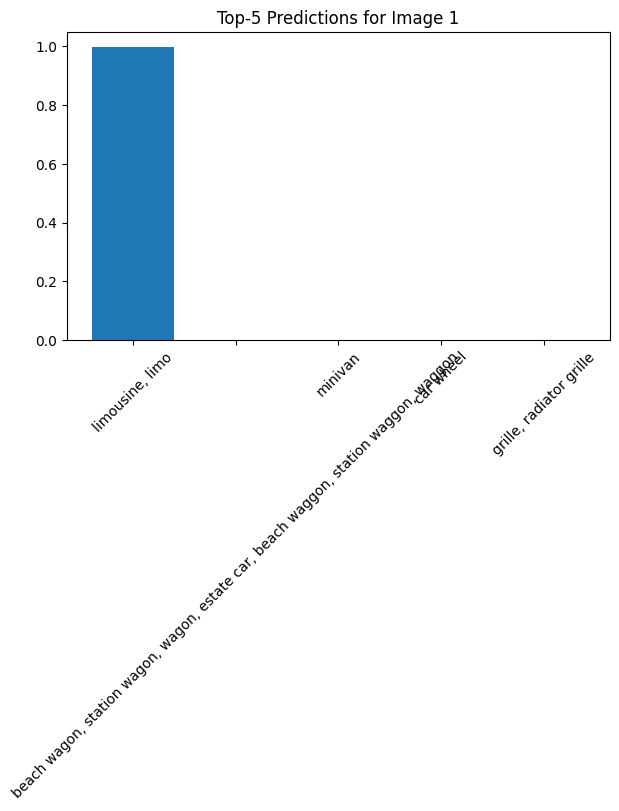

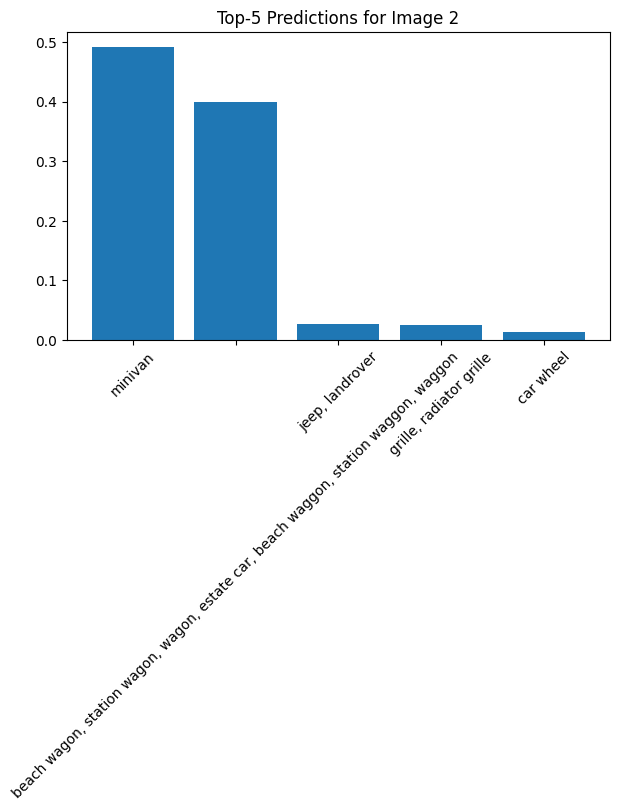

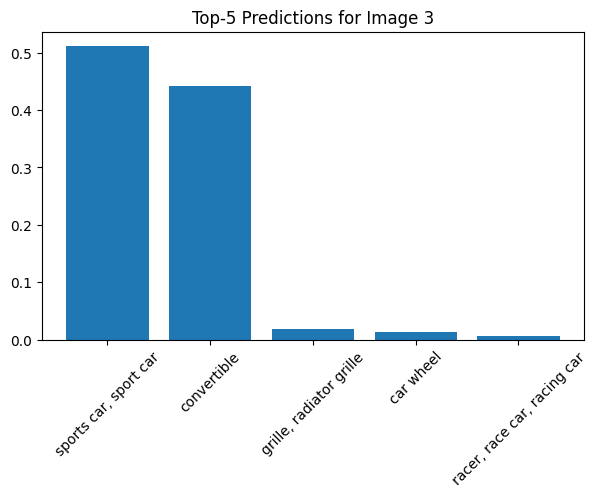

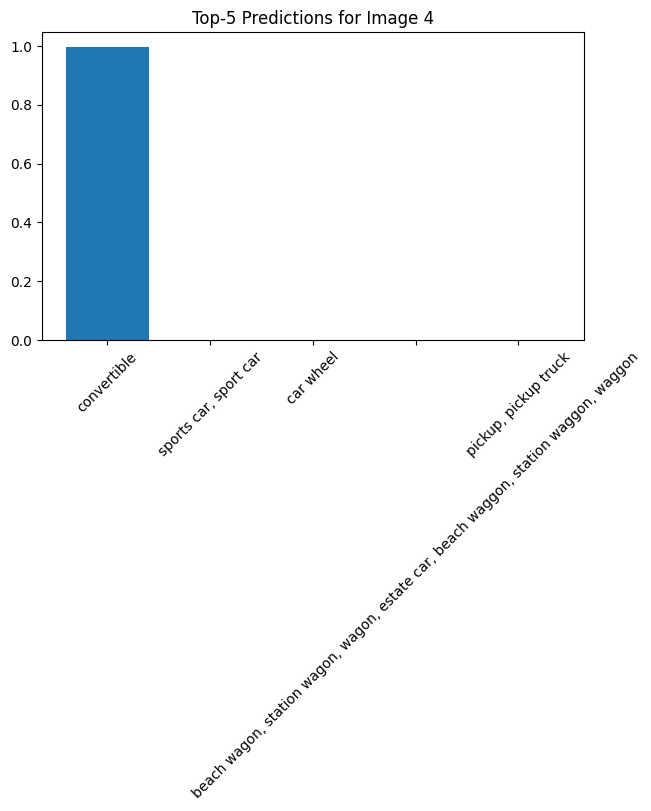

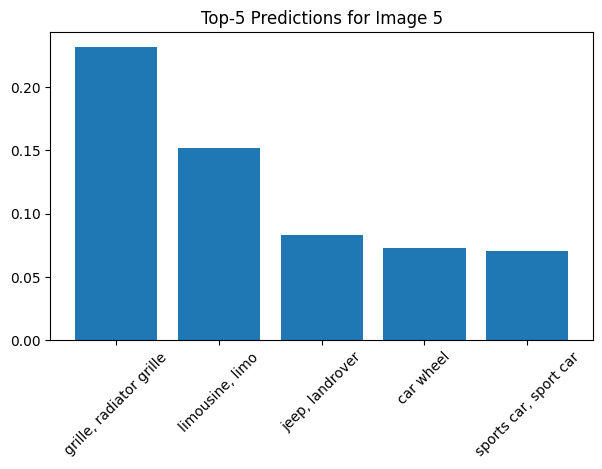

In [30]:
for i in range(len(images)):
    labels = [model.config.id2label[idx.item()] for idx in top5.indices[i]]
    values = top5.values[i].numpy()

    plt.figure(figsize=(7,4))
    plt.bar(labels, values)
    plt.title(f"Top-5 Predictions for Image {i+1}")
    plt.xticks(rotation=45)
    plt.show()